In [42]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
import matplotlib.pyplot as plt
import scipy.stats
import csv
import seaborn as sns
import json

## Read Data and Add Header

with open('Users\Kyle\Documents\Data Science (DSC540)\Project\diabetes.json') as file:
     variable_name = json.load(file)
# Print Header
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
## Seeing how many Rows/Collumns there are to check the size of the data set
df.shape

(768, 9)

In [44]:
## Looking at overall description of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
## This is the first step to check to see if there are missing null variables. 
## Since there are none I moved on with processing the data

## Checking for Null values incase have to alter data. No Nulls found

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
## Wanted to see the data categories of Pregnancies column 

df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [56]:
## Wanted to see the data categories of Age column 

df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

<AxesSubplot:xlabel='Age'>

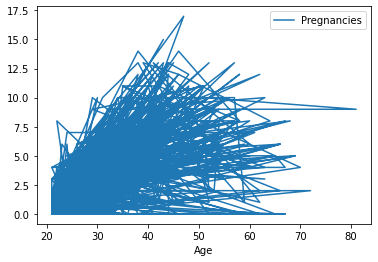

In [57]:
## Simple plot to see how I should approach and view the data. 
## This told me that this is not the best way to represent the data

df.plot(x = 'Age', y = 'Pregnancies')

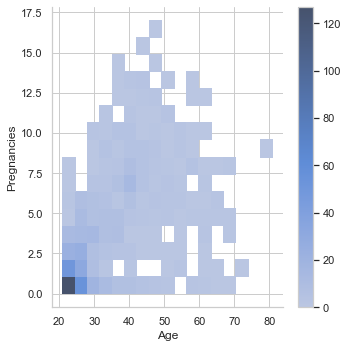

In [58]:
## Using displot distrubtion to see how Age and pregnancy distribution against each other

## *I used this method to also check for anything that correlates or to find a linear relationship*

sns.set_theme(style="whitegrid")
sns.displot(x = df.Age, y = df.Pregnancies, cbar = True);

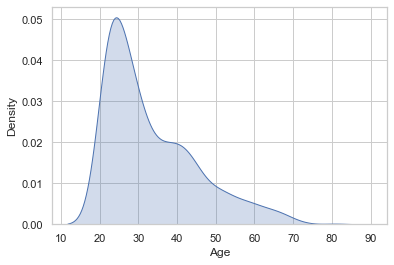

In [59]:
## Simple KDE plot of Age, wanted to see the density

## *Wanted to check the density of the age groups to figure out parameters 
## There is a wide range of ages. So it makes it difficult to focus on a specific range

sns.set_theme(style="whitegrid")
sns.kdeplot(df.Age, shade = True);

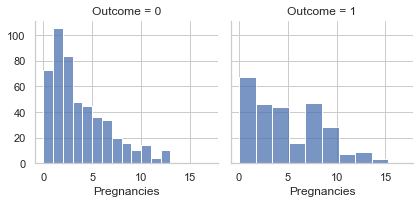

In [61]:
## Looking at the outcome for pregnancies. How it distributes separately

g = sns.FacetGrid(df, col = 'Outcome')

g.map_dataframe(sns.histplot, 'Pregnancies');

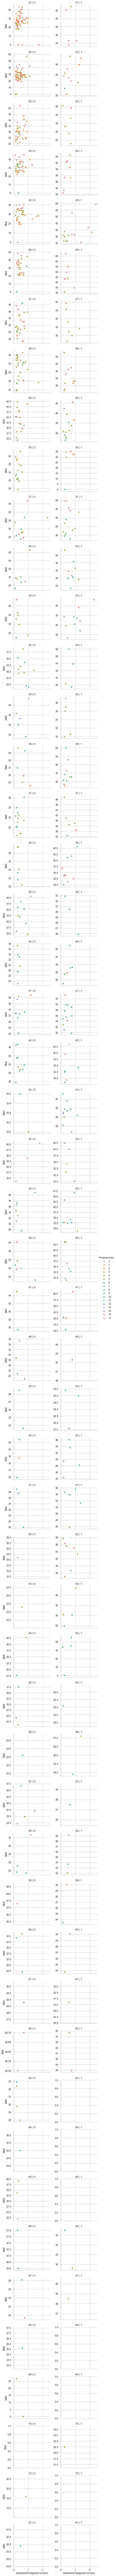

In [62]:
# What I was trying to do here is separate everything into desireable categories like age, outcome, 
# how far along the pregnancy is, age, diabetes factor and BMI,
# and look for any trends or commonalities. However The Scatter plot wasn't very useful here to visualize the data. 
# While having 2 different outcomes was helpful. Everything is so spread out it's difficult to make sense of it

g = sns.FacetGrid(df, col = 'Outcome', row = 'Age', hue = 'Pregnancies', sharey = False)

g.map_dataframe(sns.scatterplot, x = 'DiabetesPedigreeFunction', y = 'BMI')
g.set_axis_labels('DiabetesPedigreeFunction', 'BMI')
g.set_titles(col_template = '{col_name}', row_template = '{row_name}' )
g.add_legend();

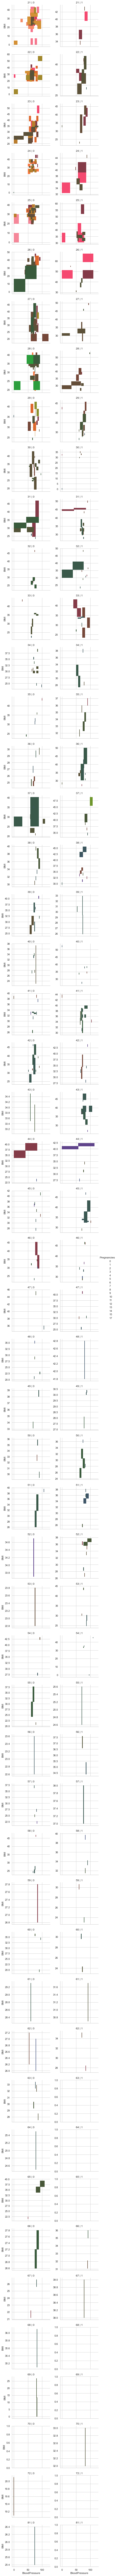

In [64]:
# I tried using a different matching indicator to try and get a better idea of how things are grouped between the different
# ages with all of the constraints I was looking for. I do think I'm getting closer to the compounding visualization
# I am looking for. I need to work better on how to better put the graph together so that way it is easily readable.
g = sns.FacetGrid(df, col = 'Outcome', row = 'Age', hue = 'Pregnancies', sharey = False)

g.map_dataframe(sns.histplot, x = 'BloodPressure', y = 'BMI')
g.set_axis_labels('BloodPressure', 'BMI')
g.set_titles(col_template = '{col_name}', row_template = '{row_name}' )
g.add_legend();